In [84]:
# Importnado bibliotecas e módulos necessários

import pandas as pd # Pandas para manipulação de dataframes
from dfply import * # Importação dos módulos necessário para trabalhar com pipe em Python
import numpy as np # Operações matemáticas
import matplotlib.dates as mdates # Arrumar as datas no eixo

# Visualização dos dados
import seaborn as sns 
import matplotlib.pyplot as plt
# Evitar ficar usando plt.show()
%matplotlib inline

In [94]:
# Configurações globais
sns.set_style('darkgrid') # background
sns.set_context('paper') # Formato artigo
plt.tight_layout()
# Parametros e rcParams vai setar configurações globais para os gráficos, ela serve também como mecanismo de controle
parametros = {'legend.fontsize': 12,
          'figure.figsize': (15,7)} #15,7
plt.rcParams.update(parametros)
plt.tight_layout()

<Figure size 720x360 with 0 Axes>

In [55]:
df_teste = pd.read_csv('https://raw.githubusercontent.com/FlavioMacaubas/covid_19_paraiba/master/base_dados.csv')

In [56]:
campina_grande = df_teste.loc[df_teste['cidade'] == 'Cajazeiras']
campina_grande.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
268,2020-04-21,Cajazeiras,2,1,0,2,1
292,2020-04-22,Cajazeiras,2,1,0,0,0
320,2020-04-23,Cajazeiras,4,1,0,2,0
349,2020-04-24,Cajazeiras,4,1,0,0,0
384,2020-04-25,Cajazeiras,4,1,0,0,0


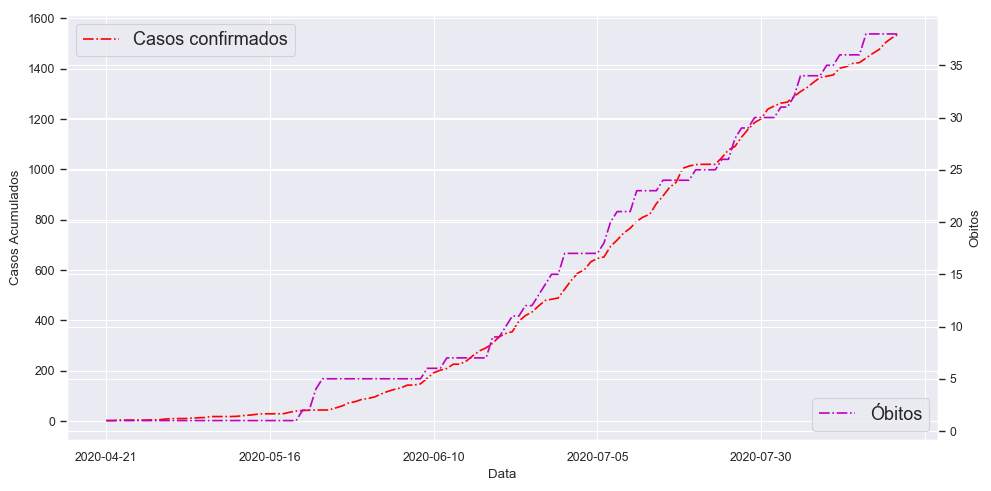

In [82]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(campina_grande['data']))
fig, ax = plt.subplots(dpi = 100)
ax.plot(campina_grande['data'], campina_grande['confirmados'], 'r-.', label = 'Casos confirmados')
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Casos Acumulados') # Nome do eixo y

ax1 = ax.twinx()
ax1.plot(campina_grande['data'],campina_grande['obitos'], 'm-.', label = 'Óbitos') 
ax1.set_ylabel('Obitos') # Nome do eixo y


ax.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define quantidad de label
plt.tight_layout() # Organiza o espaço
ax.legend(loc = 'upper left')
ax1.legend(loc = 'lower right')
plt.savefig('confirmados_caja.png')

In [85]:
media_movel = (campina_grande
               >> mutate(mm_7_novos_confirmados =  X.novos_casos.ewm(span=5, adjust=False).mean())
               >> mutate(mm_7_novos_obitos = X.novos_obitos.ewm(span=5, adjust=False).mean()) 
               >> drop(X.confirmados, X.obitos, X.recuperados)) 
media_movel.tail()

,data,cidade,novos_casos,novos_obitos,mm_7_novos_confirmados,mm_7_novos_obitos
21451,2020-08-16,Cajazeiras,18,0,14.279356,0.519764
21675,2020-08-17,Cajazeiras,16,0,14.852904,0.346509
21899,2020-08-18,Cajazeiras,28,0,19.235269,0.231006
22123,2020-08-19,Cajazeiras,19,0,19.156846,0.154004
22347,2020-08-20,Cajazeiras,15,0,17.771231,0.102669


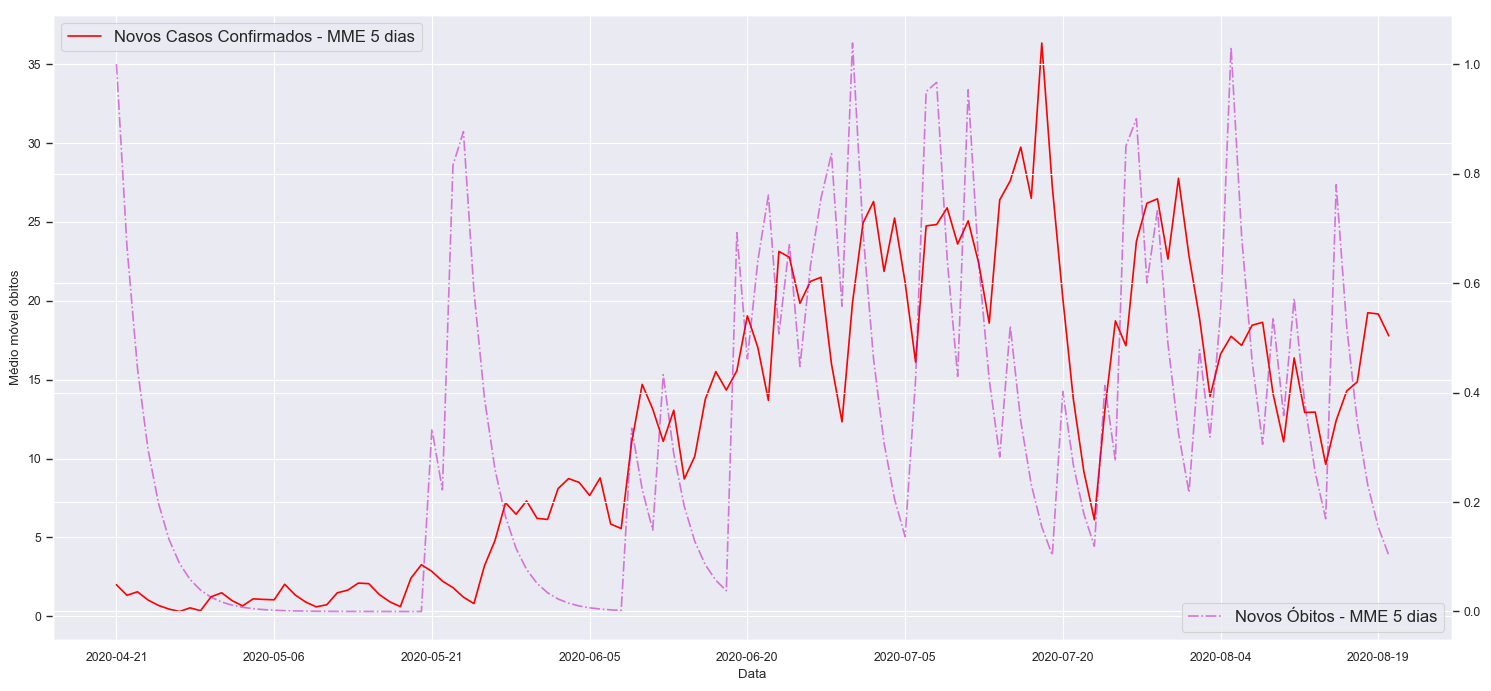

In [95]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(campina_grande['data']))
fig, ax = plt.subplots(dpi = 100)
ax.plot(media_movel.data, media_movel.mm_7_novos_confirmados, 'r-', label = 'Novos Casos Confirmados - MME 5 dias')
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Média móvel confirmados') # Nome do eixo y

ax1 = ax.twinx()
ax1.plot(media_movel.data,media_movel.mm_7_novos_obitos, 'm-.', alpha = 0.5, label = 'Novos Óbitos - MME 5 dias') 
ax.set_ylabel('Médio móvel óbitos') # Nome do eixo y



ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'upper left')
ax1.legend(loc = 'lower right')

plt.savefig('novos_cajazeiras.png')

# Análise Regiões Metropolitanas

## Zona metropolitana de João Pessoa

In [59]:
df_teste = df_teste[['data','cidade','confirmados']]
pb = df_teste.loc[(df_teste['cidade'] == 'Paraíba')]

In [60]:
jp = df_teste.loc[(df_teste['cidade'] == 'João Pessoa')]
conde = df_teste.loc[((df_teste['cidade'] == 'Conde') )]
bayeux = df_teste.loc[(df_teste['cidade'] == 'Bayeux')]
lucena = df_teste.loc[(df_teste['cidade'] == 'Lucena')]
sr = df_teste.loc[(df_teste['cidade'] == 'Santa Rita')]
alhandra = df_teste.loc[(df_teste['cidade'] == 'Alhandra')]
rio_tinto = df_teste.loc[(df_teste['cidade'] == 'Rio Tinto')]
cruz_es = df_teste.loc[(df_teste['cidade'] == 'Cruz do Espírito Santo')]
pedras_de_fogo = df_teste.loc[(df_teste['cidade'] == 'Pedras de Fogo')]
caapora = df_teste.loc[ (df_teste['cidade'] == 'Caaporã')]
pitimbu = df_teste.loc[(df_teste['cidade'] == 'Pitimbu')]
cabedelo = df_teste.loc[(df_teste['cidade'] == 'Cabedelo')]

In [61]:
dfs = [jp,conde,bayeux,lucena,sr,alhandra,rio_tinto,cruz_es,pedras_de_fogo,caapora,pitimbu, cabedelo, pb]

zm_jp = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zm_jp.columns = ['data','cidade','c_jp','cidade','c_conde','cidade','c_b','cidade','c_lucena', 'cidade','c_sr',
                 'cidade','c_alhandra','cidade','c_rt', 'cidade','c_ces','cidade','c_pf','cidade','c_caa','cidade','c_pit', 'cidade','c_cabedelo', 'cidade','c_pb']

del zm_jp['cidade']

zm_jp.head()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb
0,2020-05-01,614,16,39,4,96,4,4,3,6,3,1,29,1034
1,2020-05-02,701,17,41,5,100,7,4,4,9,3,1,39,1169
2,2020-05-03,711,17,43,5,111,7,4,4,9,3,2,39,1219
3,2020-05-04,802,17,44,5,122,8,4,6,10,4,2,44,1361
4,2020-05-05,865,18,45,6,129,8,5,7,15,5,2,51,1493


In [62]:
zm_jp['total_zona'] =  zm_jp.sum(axis=1) - zm_jp['c_pb']

In [63]:
zm_jp.head()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb,total_zona
0,2020-05-01,614,16,39,4,96,4,4,3,6,3,1,29,1034,819
1,2020-05-02,701,17,41,5,100,7,4,4,9,3,1,39,1169,931
2,2020-05-03,711,17,43,5,111,7,4,4,9,3,2,39,1219,955
3,2020-05-04,802,17,44,5,122,8,4,6,10,4,2,44,1361,1068
4,2020-05-05,865,18,45,6,129,8,5,7,15,5,2,51,1493,1156


In [64]:
zm_jp['participacao'] = zm_jp['total_zona']*100/zm_jp['c_pb']
zm_jp.tail()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb,total_zona,participacao
107,2020-08-16,24596,721,1676,391,2742,610,1035,278,1269,921,611,2621,96033,37471,39.018879
108,2020-08-17,24597,722,1680,392,2743,611,1035,278,1269,921,611,2622,96223,37481,38.952226
109,2020-08-18,24915,729,1700,392,2749,614,1038,278,1273,925,611,2637,97497,37861,38.832990
110,2020-08-19,25053,743,1707,398,2781,618,1056,278,1275,925,611,2651,98494,38096,38.678498
111,2020-08-20,25299,750,1715,405,2843,618,1062,280,1281,925,611,2659,99445,38448,38.662577


## Zona Metropolitana de Campina Grande

In [65]:
cg = df_teste.loc[(df_teste['cidade'] == 'Campina Grande')]
puxinana = df_teste.loc[((df_teste['cidade'] == 'Puxinanã') )]
lagoa_seca = df_teste.loc[(df_teste['cidade'] == 'Lagoa Seca')]
massaranduba = df_teste.loc[(df_teste['cidade'] == 'Massaranduba')]
serra_redonda = df_teste.loc[(df_teste['cidade'] == 'Serra Redonda')]
itatuba = df_teste.loc[(df_teste['cidade'] == 'Itatuba')]
queimadas = df_teste.loc[(df_teste['cidade'] == 'Queimadas')]
boqueirao = df_teste.loc[(df_teste['cidade'] == 'Boqueirão')]
barra_santana = df_teste.loc[(df_teste['cidade'] == 'Barra de Santana')]
gado_bravo = df_teste.loc[(df_teste['cidade'] == 'Gado Bravo')]
aroeiras = df_teste.loc[(df_teste['cidade'] == 'Aroeiras')]
umbuzeiro = df_teste.loc[(df_teste['cidade'] == 'Umbuzeiro')]


In [66]:
dfs = [cg, puxinana, lagoa_seca, massaranduba,serra_redonda,itatuba,queimadas, boqueirao,barra_santana,gado_bravo,aroeiras, umbuzeiro, pb]

zm_cg = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zm_cg.columns = ['data','cidade','c_cg','cidade','c_pux','cidade','c_ls','cidade','c_massa', 'cidade','c_sr',
                 'cidade','c_ita','cidade','c_quei', 'cidade','c_boq','cidade','c_bs','cidade','c_gb','cidade','c_a', 'cidade','c_umbu', 'cidade','c_pb']

del zm_cg['cidade']

zm_cg.head()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb
0,2020-05-12,134,1,8,4,2,2,6,2,2,2,2,4,2777
1,2020-05-13,155,1,8,4,2,2,6,2,2,2,5,5,3045
2,2020-05-14,160,1,8,4,2,4,6,2,4,2,5,7,3361
3,2020-05-15,261,1,8,4,2,4,17,2,4,2,5,7,3739
4,2020-05-16,280,1,8,6,2,8,17,2,4,4,5,8,4063


In [67]:
zm_cg["total_zona"] = zm_cg.sum(axis=1) - zm_cg['c_pb']
zm_cg.head()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb,total_zona
0,2020-05-12,134,1,8,4,2,2,6,2,2,2,2,4,2777,169
1,2020-05-13,155,1,8,4,2,2,6,2,2,2,5,5,3045,194
2,2020-05-14,160,1,8,4,2,4,6,2,4,2,5,7,3361,205
3,2020-05-15,261,1,8,4,2,4,17,2,4,2,5,7,3739,317
4,2020-05-16,280,1,8,6,2,8,17,2,4,4,5,8,4063,345


In [68]:
zm_cg['participacao'] = zm_cg['total_zona']*100/zm_cg['c_pb']
zm_cg.tail()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb,total_zona,participacao
96,2020-08-16,11759,266,663,313,255,327,1092,355,97,94,203,76,96033,15500,16.140285
97,2020-08-17,11776,266,663,313,255,328,1092,355,103,94,203,76,96223,15524,16.133357
98,2020-08-18,11901,268,666,318,257,330,1105,360,103,94,204,77,97497,15683,16.085623
99,2020-08-19,11965,271,669,321,257,333,1113,363,103,95,205,77,98494,15772,16.013158
100,2020-08-20,12036,275,672,324,261,336,1125,366,103,95,205,77,99445,15875,15.963598


## Zona Metropolitana Patos

In [69]:
patos = df_teste.loc[(df_teste['cidade'] == 'Patos')]
santa_teresinha = df_teste.loc[(df_teste['cidade'] == 'Santa Teresinha')]
condado = df_teste.loc[(df_teste['cidade'] == 'Condado')]
malta = df_teste.loc[(df_teste['cidade'] == 'Malta')]
santa_luzia = df_teste.loc[(df_teste['cidade'] == 'Santa Luzia')]
sjs = df_teste.loc[(df_teste['cidade'] == 'São José do Sabugi')]
js = df_teste.loc[(df_teste['cidade'] == 'Junco do Seridó')]
teixeira = df_teste.loc[(df_teste['cidade'] == 'Teixeira')]
mat = df_teste.loc[(df_teste['cidade'] == 'Maturéia')]

In [70]:
dfs = [patos, santa_teresinha, condado, malta, santa_luzia, sjs, js, teixeira, mat, pb]

zm_pt = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)


zm_pt.columns = ['data','cidade','c_pt','cidade','c_st','cidade','c_cond','cidade','c_malta', 'cidade','c_sl',
                 'cidade','c_sjs','cidade','c_js', 'cidade','c_tex','cidade','c_mat', 'cidade','c_pb']

del zm_pt['cidade']

zm_pt.tail()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb
97,2020-08-16,3283,53,123,99,241,220,55,160,40,96033
98,2020-08-17,3306,54,123,105,241,223,56,160,40,96223
99,2020-08-18,3383,54,124,105,247,224,57,161,47,97497
100,2020-08-19,3407,54,125,105,250,233,57,164,47,98494
101,2020-08-20,3433,54,125,106,251,233,57,165,48,99445


In [71]:
zm_pt["total_zona"] = zm_pt.sum(axis=1) - zm_pt['c_pb']
zm_pt.head()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb,total_zona
0,2020-05-11,109,1,11,1,1,2,3,1,1,2525,130
1,2020-05-12,128,1,14,1,1,2,3,1,1,2777,152
2,2020-05-13,138,1,14,2,4,2,3,1,1,3045,166
3,2020-05-14,174,1,14,2,4,2,3,1,1,3361,202
4,2020-05-15,219,1,20,4,4,2,3,1,1,3739,255


In [72]:
zm_pt['participacao'] = zm_pt['total_zona']*100/zm_pt['c_pb']
zm_pt.tail()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb,total_zona,participacao
97,2020-08-16,3283,53,123,99,241,220,55,160,40,96033,4274,4.450553
98,2020-08-17,3306,54,123,105,241,223,56,160,40,96223,4308,4.477100
99,2020-08-18,3383,54,124,105,247,224,57,161,47,97497,4402,4.515011
100,2020-08-19,3407,54,125,105,250,233,57,164,47,98494,4442,4.509919
101,2020-08-20,3433,54,125,106,251,233,57,165,48,99445,4472,4.496958


## Juntando Base de Dados

In [73]:
zm_jp = zm_jp[['data','participacao']]
zm_cg = zm_cg[['data','participacao']]
zm_pt = zm_pt[['data','participacao']]

In [74]:
dfs = [zm_jp,zm_cg,zm_pt]

zonas = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zonas.columns = ['data','part_jp','part_cg','part_pt']

zonas.tail()

,data,part_jp,part_cg,part_pt
96,2020-08-16,39.018879,16.140285,4.450553
97,2020-08-17,38.952226,16.133357,4.477100
98,2020-08-18,38.832990,16.085623,4.515011
99,2020-08-19,38.678498,16.013158,4.509919
100,2020-08-20,38.662577,15.963598,4.496958


In [75]:
zm_jp.tail(10)

,data,participacao
102,2020-08-11,38.989752
103,2020-08-12,39.074459
104,2020-08-13,39.032347
105,2020-08-14,38.976336
106,2020-08-15,38.870988
107,2020-08-16,39.018879
108,2020-08-17,38.952226
109,2020-08-18,38.832990
110,2020-08-19,38.678498
111,2020-08-20,38.662577


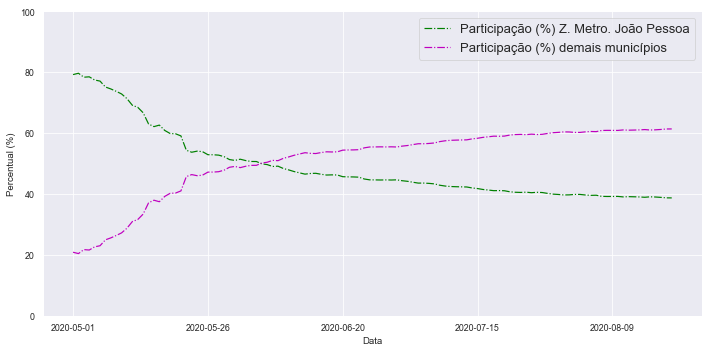

In [76]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(campina_grande['data']))
fig, ax = plt.subplots()
ax.plot(zm_jp['data'], zm_jp['participacao'], 'g-.', label = 'Participação (%) Z. Metro. João Pessoa')
ax.plot(zm_jp['data'], 100 - zm_jp['participacao'], 'm-.', label = 'Participação (%) demais municípios') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Percentual (%)') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define quantidad de label
plt.ylim(0,100)
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'best')
plt.savefig('jp_resto.png')

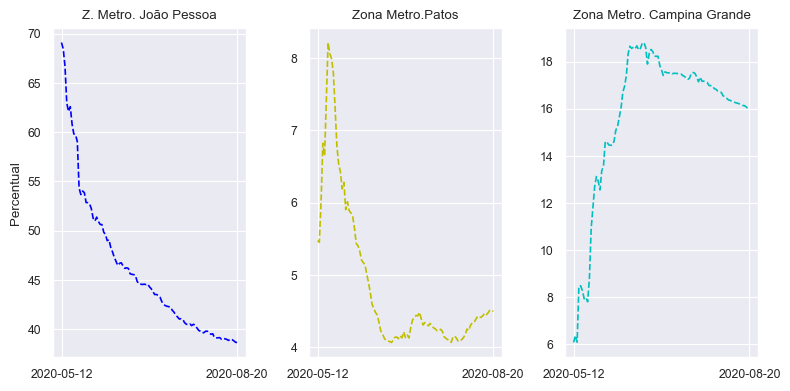

In [77]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100, nrows=1, ncols=3)

#João Pessoa
ax[0].set_title('Z. Metro. João Pessoa')
ax[0].plot(zonas['data'], zonas['part_jp'], 'b--')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label
ax[0].set_ylabel('Percentual')

# Patos
ax[1].set_title('Zona Metro.Patos')
ax[1].plot(zonas['data'], zonas['part_pt'], 'y--')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label

# CG
ax[2].set_title('Zona Metro. Campina Grande')
ax[2].plot(zonas['data'], zonas['part_cg'], 'c--')



ax[2].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label



plt.tight_layout() # Organiza o espaço

fig.savefig('prop_muni_cg.png')